In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
# checking for any missing values
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


customer ID and gender and age aren't that informative for this study case , so we can drop them

In [ ]:
df = df.drop(['CustomerID' , 'Gender', 'Age'],axis = 1 )

In [ ]:
print(df)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already
from sklearn.cluster import KMeans ,AgglomerativeClustering, DBSCAN, SpectralClustering

In [ ]:
# choosing number of clusters
# can be choosed using WCSS - within clusters sum of squares  ,distance between each datapoint and its centroid

# elbow method

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)



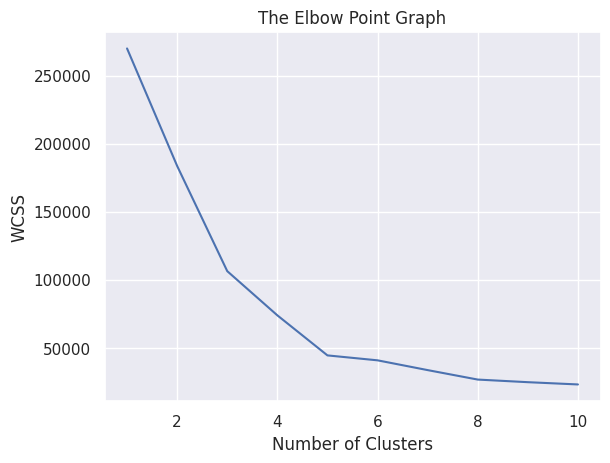

In [ ]:
 # plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

from the grpah we get 2 optimum no of clusters but after k =5 there is no significant drop , so we choose k as 5

5 clustres are 0 , 1, 2, 3, 4

In [ ]:
X = df

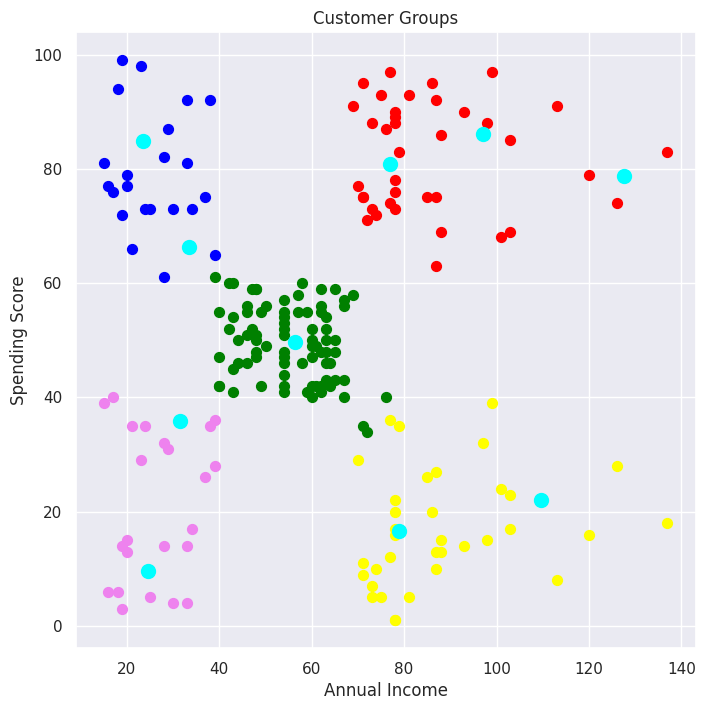

In [ ]:
# Assuming Y contains the cluster labels assigned by KMeans

plt.figure(figsize=(8,8))

# Access columns by name or integer position
plt.scatter(X.loc[Y==0, 'Annual Income (k$)'], X.loc[Y==0, 'Spending Score (1-100)'], s=50, c='green', label='Cluster 1')
plt.scatter(X.loc[Y==1, 'Annual Income (k$)'], X.loc[Y==1, 'Spending Score (1-100)'], s=50, c='red', label='Cluster 2')
plt.scatter(X.loc[Y==2, 'Annual Income (k$)'], X.loc[Y==2, 'Spending Score (1-100)'], s=50, c='yellow', label='Cluster 3')
plt.scatter(X.loc[Y==3, 'Annual Income (k$)'], X.loc[Y==3, 'Spending Score (1-100)'], s=50, c='violet', label='Cluster 4')
plt.scatter(X.loc[Y==4, 'Annual Income (k$)'], X.loc[Y==4, 'Spending Score (1-100)'], s=50, c='blue', label='Cluster 5')


# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

The silhouette score measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, where higher values indicate better clustering.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, Y)  # df is your data, Y are cluster labels
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.553931997444648


K-Means Silhouette Score: 0.5546571631111091
Agglomerative Silhouette Score: 0.5538089226688662
DBSCAN Silhouette Score: 0.31614121976731185
Spectral Silhouette Score: 0.48812722440195083
GMM Silhouette Score: 0.5536892843811245


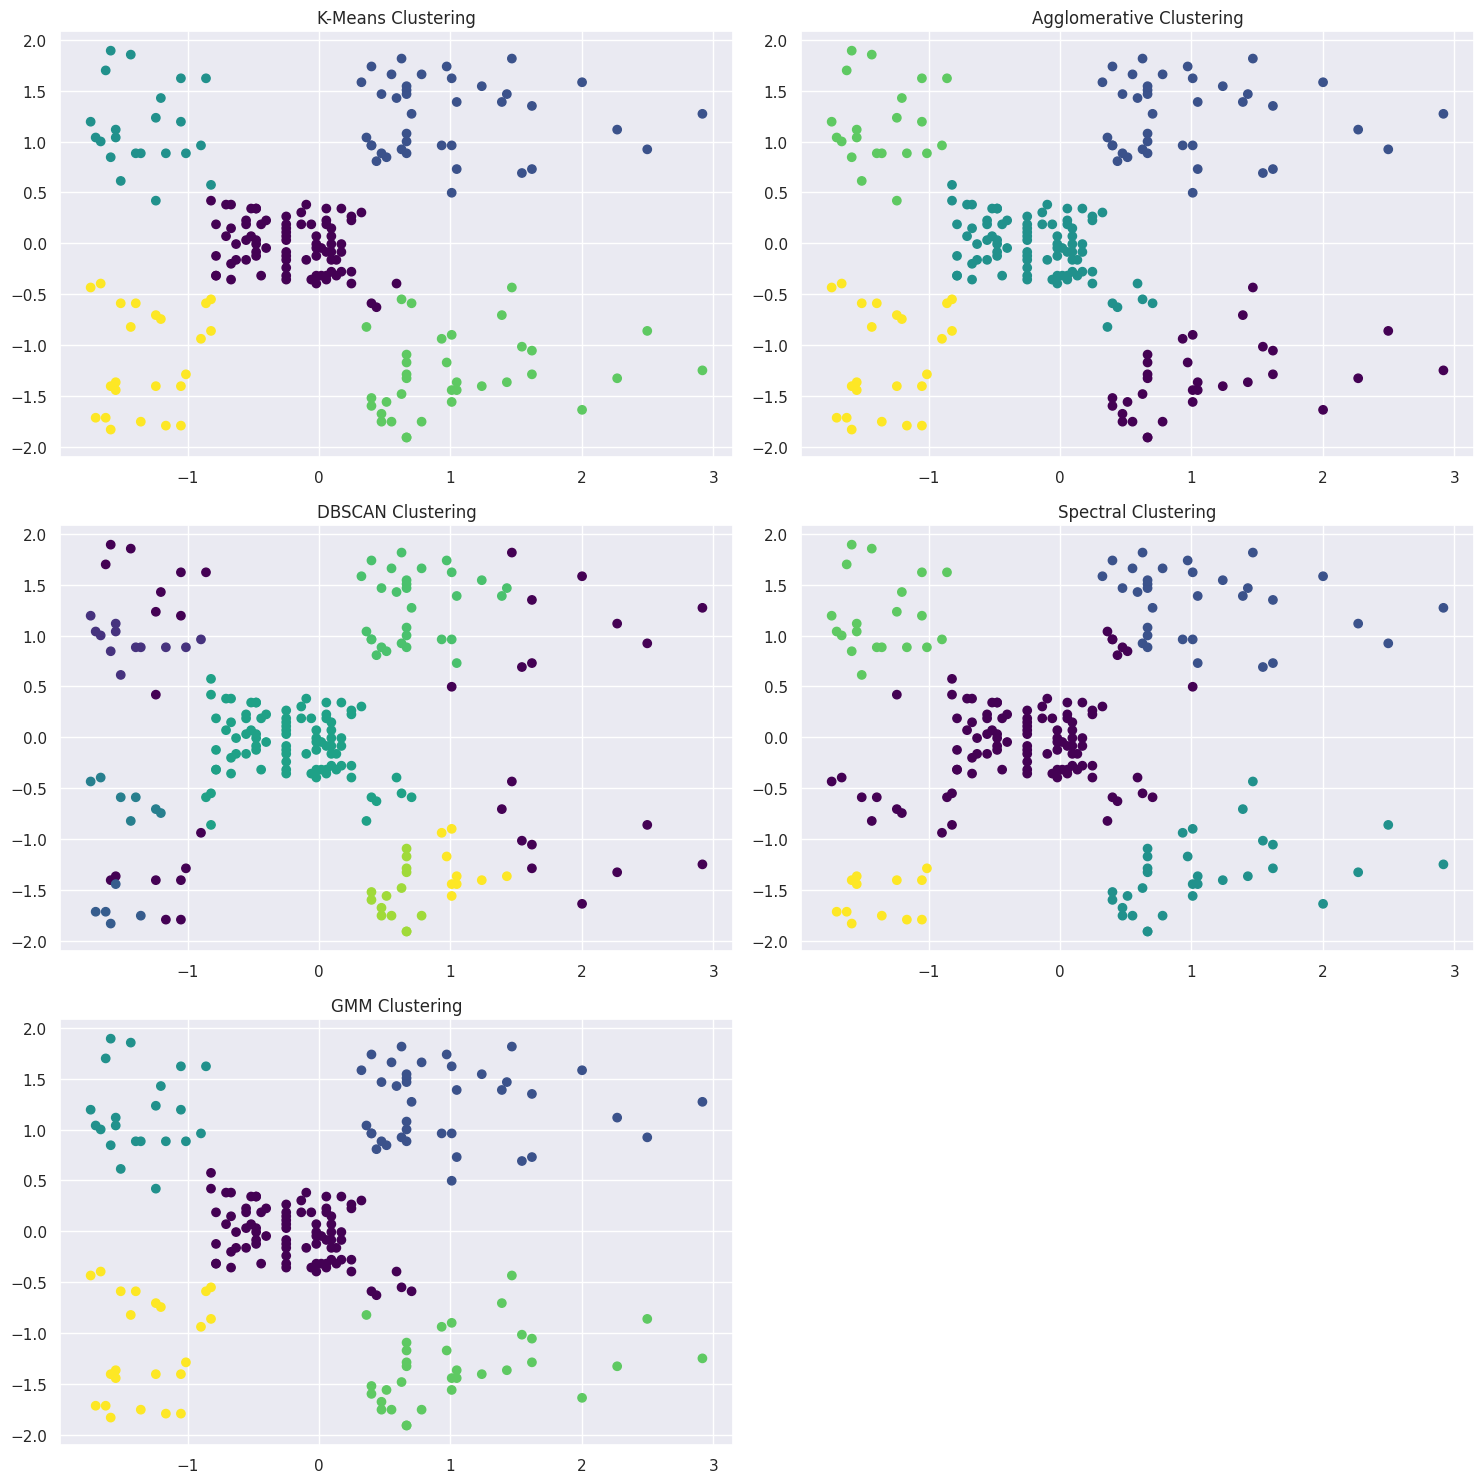

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Assuming your data is in a pandas DataFrame called 'df' with features 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative.fit_predict(X_scaled)

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# 4. Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='rbf', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

# 5. Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agglomerative_silhouette = silhouette_score(X_scaled, agglomerative_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Spectral Silhouette Score: {spectral_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")

# Plotting the clusters
plt.figure(figsize=(15, 15))

# K-Means
plt.subplot(3, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# Agglomerative
plt.subplot(3, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

# DBSCAN
plt.subplot(3, 2, 3)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

# Spectral
plt.subplot(3, 2, 4)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=spectral_labels, cmap='viridis')
plt.title('Spectral Clustering')

# GMM
plt.subplot(3, 2, 5)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis')
plt.title('GMM Clustering')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming your data is in a pandas DataFrame called 'df' with features 'Annual Income (k$)' and 'Spending Score (1-100)'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. K-Means Clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# 2. Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=5)
agglomerative_labels = agglomerative.fit_predict(X_scaled)

# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# 4. Spectral Clustering
spectral = SpectralClustering(n_clusters=5, affinity='rbf', random_state=42)
spectral_labels = spectral.fit_predict(X_scaled)

# 5. Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluate clustering performance using silhouette score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agglomerative_silhouette = silhouette_score(X_scaled, agglomerative_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
spectral_silhouette = silhouette_score(X_scaled, spectral_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Silhouette Score: {agglomerative_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"Spectral Silhouette Score: {spectral_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")

K-Means Silhouette Score: 0.5546571631111091
Agglomerative Silhouette Score: 0.5538089226688662
DBSCAN Silhouette Score: 0.31614121976731185
Spectral Silhouette Score: 0.48812722440195083
GMM Silhouette Score: 0.5536892843811245
